In [1]:
import pandas as pd

In [2]:
# load the data
df_train = pd.read_csv('../data/processed/application_train.csv')
df_test = pd.read_csv('../data/processed/application_test.csv')

# join the data
df = pd.concat([df_train, df_test], axis=0)

# check the data
df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100083,0.0,0,103500.0,573628.5,24435.0,463500.0,0.00966,-15406,-892,...,0,0,0,0,0,0,1,0,1,0
1,100145,0.0,1,202500.0,260725.5,16789.5,198000.0,0.01884,-16282,-4375,...,0,0,0,0,0,1,0,0,1,0
2,100179,0.0,0,202500.0,675000.0,53329.5,675000.0,0.03134,-11375,-2311,...,0,0,0,1,0,0,0,0,1,0
3,100190,0.0,0,162000.0,263686.5,24781.5,238500.0,0.02263,-13972,-4472,...,0,0,0,0,0,1,0,0,1,0
4,100295,1.0,1,225000.0,1019205.0,31032.0,774000.0,0.07250,-11356,-602,...,0,0,0,0,0,1,0,0,1,0


0.0    8076
1.0     526
Name: TARGET, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

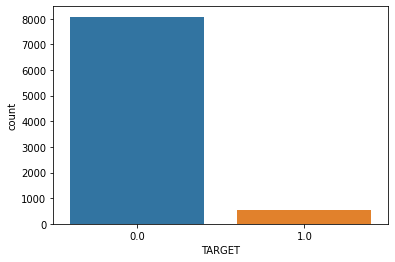

In [3]:
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# print class distribution
print(df['TARGET'].value_counts())

# plot class distribution
sns.countplot(df['TARGET'])

<AxesSubplot:ylabel='TARGET'>

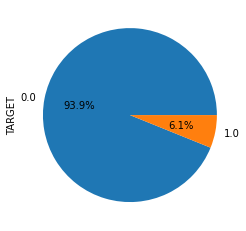

In [4]:
# pie chart
df['TARGET'].value_counts().plot.pie(autopct='%1.1f%%')

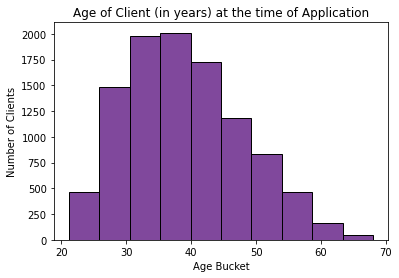

In [5]:
plt.hist(df['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='#80489C')
plt.title('Age of Client (in years) at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

In [6]:
capable_days_birth = df[df['TARGET'] == 0]['DAYS_BIRTH'].values/-365
capable_days_birth

array([42.20821918, 44.60821918, 31.16438356, ..., 38.37534247,
       55.46849315, 38.64657534])

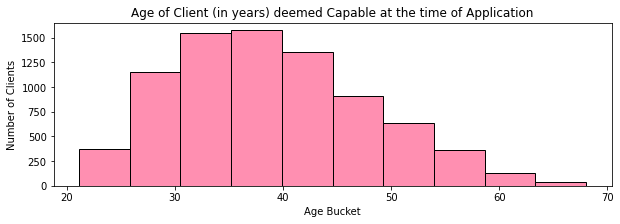

In [7]:
plt.figure(figsize=(10,3))
plt.hist(capable_days_birth, bins=10, edgecolor='black', color='#FF8FB1')
plt.title('Age of Client (in years) deemed Capable at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

In [8]:
not_capable_days_birth = df[df['TARGET'] == 1]['DAYS_BIRTH'].values/-365
not_capable_days_birth

array([31.11232877, 22.09041096, 51.34246575, 37.91780822, 28.9890411 ,
       50.54246575, 38.18082192, 34.29589041, 27.42465753, 48.17534247,
       33.02465753, 38.07123288, 30.92054795, 52.54246575, 55.98082192,
       25.65479452, 38.84109589, 43.42191781, 39.21643836, 33.73972603,
       30.75890411, 36.94246575, 33.94520548, 25.24109589, 44.10958904,
       27.34794521, 26.43013699, 54.69589041, 32.58356164, 34.8       ,
       41.90684932, 33.19178082, 38.26027397, 53.77808219, 37.42739726,
       45.88219178, 37.36986301, 42.55616438, 27.83013699, 42.47671233,
       27.23013699, 31.9260274 , 27.06575342, 31.98630137, 28.43287671,
       34.74520548, 38.30136986, 23.95342466, 37.05479452, 29.73150685,
       21.81369863, 44.17808219, 22.28219178, 46.99178082, 35.76164384,
       38.93424658, 23.94520548, 26.90684932, 41.05205479, 30.2630137 ,
       24.29315068, 37.22465753, 49.43287671, 38.99726027, 37.93150685,
       51.00273973, 34.70136986, 32.63287671, 42.27123288, 38.75

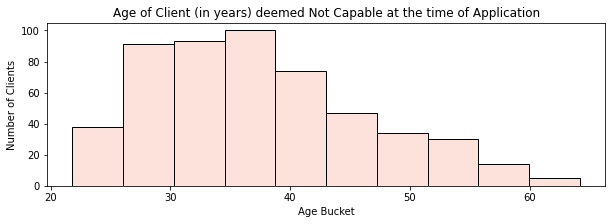

In [9]:
plt.figure(figsize=(10,3))
plt.hist(not_capable_days_birth, bins=10, edgecolor='black', color='#FCE2DB')
plt.title('Age of Client (in years) deemed Not Capable at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

In [10]:
capable_days_employed = df[df['TARGET']==0]['DAYS_EMPLOYED'].values / 365
not_capable_days_employed = df[df['TARGET']==1]['DAYS_EMPLOYED'].values / 365

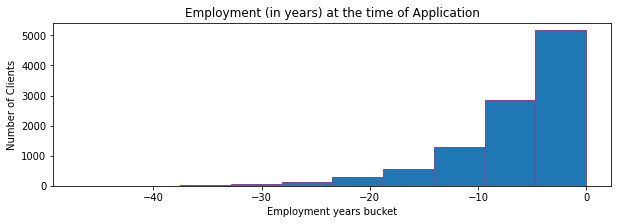

In [11]:
plt.figure(figsize=(10,3))
plt.hist(df['DAYS_EMPLOYED'].values / 365, bins=10, edgecolor='#80489C')
plt.title('Employment (in years) at the time of Application')
plt.xlabel('Employment years bucket')
plt.ylabel('Number of Clients')
plt.show()

In [12]:
# find the number of records where DAYS_EMPLOYED is between [900,1100] years. 
thousand_anomalies = df[(df['DAYS_EMPLOYED']/365>=900) & (df['DAYS_EMPLOYED']/365<=1100)]
len(thousand_anomalies)

0

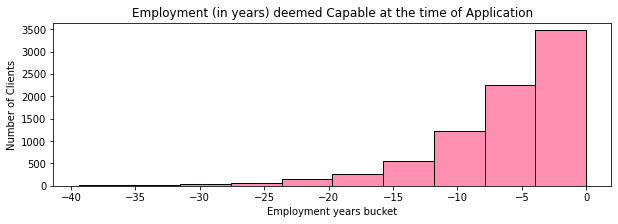

In [13]:
plt.figure(figsize=(10,3))
plt.hist(capable_days_employed, bins=10, edgecolor='black', color='#FF8FB1')
plt.title('Employment (in years) deemed Capable at the time of Application')
plt.xlabel('Employment years bucket')
plt.ylabel('Number of Clients')
plt.show()

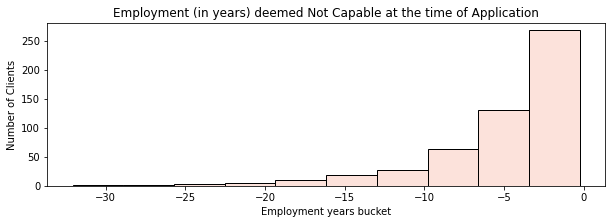

In [14]:
plt.figure(figsize=(10,3))
plt.hist(not_capable_days_employed, bins=10, edgecolor='black', color='#FCE2DB')
plt.title('Employment (in years) deemed Not Capable at the time of Application')
plt.xlabel('Employment years bucket')
plt.ylabel('Number of Clients')
plt.show()